In [2]:
pip install bertopic

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = BERTopic(embedding_model=sentence_model, top_n_words = 10, min_topic_size = 15, calculate_probabilities = True)
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
topic_model = BERTopic(umap_model=umap_model)
cluster_model = KMeans(n_clusters=50, init = 'k-means++')
topic_model = BERTopic(hdbscan_model=cluster_model)
# Fine-tune topic representations after training BERTopic
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 3), min_df=10)
topic_model = BERTopic(vectorizer_model=vectorizer_model)
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
topic_model = BERTopic(ctfidf_model=ctfidf_model )
docs = pd.read_csv("Downloads/clean_project_test.csv")
docs

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,review_id,stars,useful,funny,cool,text,date
0,lUUhg8ltDsUZ9h0xnwY4Dg,4.0,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07
1,7ym4hsISxBUwa3ugL7cL9Q,5.0,3,0,1,This place just opened up near rivers edge apa...,2018-05-19 15:04:56
2,qMVwOQNDqYzwodlFJ81GNw,4.0,0,0,0,"Great location, great food, and friendly staff...",2018-07-26 12:37:10
3,FNvdUOSG54IXzTXTYT6F9Q,5.0,0,0,0,I've been a few times and I haven't been disap...,2018-01-21 16:52:55
4,zIVkwgahZjOneChZFUYY4g,5.0,0,0,0,Love this place! Almost all of their menu item...,2017-12-16 03:11:50
...,...,...,...,...,...,...,...
120234,_Xv155er_YvqeP-aFSmD8Q,3.0,0,0,1,"So, to be honest, I was not that impressed. Co...",2018-09-08 20:54:31
120235,4EHpY_D2Lh0XtHF4C1yVGg,1.0,0,0,0,Horrible owner. Thinks she is better than ever...,2021-12-20 18:12:00
120236,aHQVQm-rmUDyXbOHPjNoWQ,4.0,7,0,6,Why 4 stars? Because it was a tasty lunch for ...,2019-12-19 15:23:43
120237,6DvjptSAkelhgc8teCFO1w,4.0,18,3,12,I visited Mei Mei for the first time to celebr...,2021-10-14 16:57:29


In [4]:
embeddings = sentence_model.encode(docs['text'], show_progress_bar=True)
topic_model = BERTopic().fit(docs['text'], embeddings)

Batches: 100%|██████████████████████████████| 3758/3758 [09:33<00:00,  6.55it/s]
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you

In [5]:
topics, probs = topic_model.fit_transform(docs['text'])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [6]:
topic_model.get_topic_info().head(50)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,59057,-1_was_the_we_and,"[was, the, we, and, were, it, to, of, with, for]","[Spicy Belly is located near Manayunk, located..."
1,0,2664,0_indian_naan_masala_tikka,"[indian, naan, masala, tikka, paneer, buffet, ...",[I'm honestly surprised by some of the reviews...
2,1,2663,1_burger_burgers_fries_patty,"[burger, burgers, fries, patty, impossible, ve...","[On our first visit, the food was good but ser..."
3,2,2285,2_vegan_options_food_amazing,"[vegan, options, food, amazing, place, vegans,...","[Awesome service! They always serve delicious,..."
4,3,2197,3_thai_pad_curry_noodles,"[thai, pad, curry, noodles, drunken, tom, spic...",[Tonight I went there and it was good Thai foo...
5,4,1791,4_vegetarian_vegetarians_options_great,"[vegetarian, vegetarians, options, great, serv...",[Excellent service and great food. Lots of del...
6,5,1553,5_chinese_mein_egg_fried,"[chinese, mein, egg, fried, rice, lo, chicken,...",[Recently moved to the east lake area and was ...
7,6,1446,6_tacos_taco_tortillas_salsa,"[tacos, taco, tortillas, salsa, corn, mexican,...",[Tried this taco shop last night for the first...
8,7,1411,7_pizza_crust_pizzas_toppings,"[pizza, crust, pizzas, toppings, pepperoni, th...","[Excellent pizza. Nice fresh vegetables, crust..."
9,8,1389,8_pizza_crust_vegan_pizzas,"[pizza, crust, vegan, pizzas, cheese, slice, p...","[Came here for vegan pizza, the pizza was OK n..."


In [7]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
documents = pd.DataFrame({"Document": docs['text'],
                          "ID": range(len(docs['text'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print (coherence)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

0.5587941287332876


Accuracy: 0.5847
Precision: 0.4100
Recall: 0.5847

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        59
           3       0.29      0.02      0.03       117
           4       0.59      0.99      0.74       316

    accuracy                           0.58       537
   macro avg       0.18      0.20      0.15       537
weighted avg       0.41      0.58      0.44       537



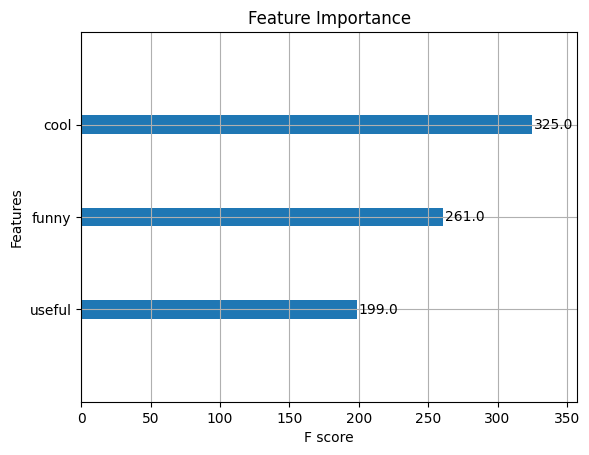

0    5
Name: stars, dtype: Int64

In [8]:
docsdf = pd.DataFrame(topic_model.get_document_info(docs['text']))
top10docsdf = docsdf[(docsdf['Topic']>= 0) & (docsdf['Topic']<= 0)] # changed for topics 0-9
filteredtop10docsdf = top10docsdf.drop(columns = ['Name','Representation', 'Representative_Docs','Top_n_words', 'Probability','Representative_document'])
joined_df = pd.merge(filteredtop10docsdf, docs, left_on = 'Document', right_on = 'text', how = 'inner')
XGB_df = joined_df.drop(columns = ['Topic','review_id','text','date',])
XGB_df['stars'] = XGB_df['stars'].apply(pd.to_numeric, errors='ignore').astype('Int64', errors='ignore')
XGB_df['stars']


import xgboost as xgb
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Load the Iris dataset

X = XGB_df[['useful', 'funny', 'cool']]
y = le.fit_transform(XGB_df['stars'])


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.2,
    'objective': 'multi:softmax',
    'num_class': 5,
    'eval_metric': 'mlogloss',  # Multi-class log loss
    'gamma': 0.2
    
}

# Train the model
num_boost_round = 1000

bst = xgb.train(params, dtrain, num_boost_round)

# Make predictions
y_pred = bst.predict(dtest)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importance
xgb.plot_importance(bst, importance_type='weight', xlabel='F score', ylabel='Features', title='Feature Importance', grid=True)
plt.show()
XGB_df['stars'].mode()

In [30]:
XGB_df['stars'].mean()

4.209775967413442

In [22]:
XGB_df['stars'].median()

5.0

In [34]:
for topic_number in range (0, 10):
     # Specify the topic number you're interested in

    # Retrieve the topic representation
    topic_representation = topic_model.get_topic(topic_number)
    
    # Extract only the words from the topic representation
    if topic_representation:  # Check if the topic exists
        topic_words = [word for word, _ in topic_representation]
        print(f"Words in Topic {topic_number}: {topic_words}")
    else:
        print(f"Topic {topic_number} does not exist.")

Words in Topic 0: ['vegan', 'options', 'food', 'amazing', 'place', 'staff', 'great', 'love', 'vegans', 'friendly']
Words in Topic 1: ['she', 'asked', 'he', 'said', 'her', 'told', 'minutes', 'our', 'us', 'manager']
Words in Topic 2: ['thai', 'pad', 'curry', 'noodles', 'spice', 'drunken', 'tom', 'panang', 'spicy', 'basil']
Words in Topic 3: ['indian', 'naan', 'masala', 'buffet', 'tikka', 'paneer', 'samosas', 'biryani', 'india', 'tandoori']
Words in Topic 4: ['pizza', 'crust', 'pizzas', 'toppings', 'pepperoni', 'slice', 'thin', 'veggie', 'cheese', 'pie']
Words in Topic 5: ['vegetarian', 'vegetarians', 'options', 'great', 'service', 'food', 'amazing', 'recommend', 'place', 'excellent']
Words in Topic 6: ['chinese', 'mein', 'fried', 'rice', 'egg', 'lo', 'chicken', 'china', 'general', 'chow']
Words in Topic 7: ['burger', 'burgers', 'fries', 'patty', 'veggie', 'bun', 'shake', 'lettuce', 'patties', 'joint']
Words in Topic 8: ['nashville', 'southern', 'in', 'east', 'place', 'this', 'vegan', 'is

In [35]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,60282,-1_was_the_and_we,"[was, the, and, we, were, it, with, to, of, for]",[I really haven't gone out to any restaurants ...
1,0,2514,0_vegan_options_food_amazing,"[vegan, options, food, amazing, place, staff, ...","[Awesome service! They always serve delicious,..."
2,1,2464,1_she_asked_he_said,"[she, asked, he, said, her, told, minutes, our...","[To start, this place was participating in Bru..."
3,2,2155,2_thai_pad_curry_noodles,"[thai, pad, curry, noodles, spice, drunken, to...",[The pad Thai is always my go-to. I typically ...
4,3,2019,3_indian_naan_masala_buffet,"[indian, naan, masala, buffet, tikka, paneer, ...",[Let me preface this by saying that I am not a...
...,...,...,...,...,...
533,532,10,532_biscuit_bonuts_nashville_biscuits,"[biscuit, bonuts, nashville, biscuits, hash, d...",[Even though I def gained some extra love on m...
534,533,10,533_drinks_rockabilly_fritters_ambience,"[drinks, rockabilly, fritters, ambience, distr...",[Booked a table for two on Valentine's Day. Im...
535,534,10,534_roll_rolls_tempura_333,"[roll, rolls, tempura, 333, uncleaned, tempera...",[Recently decided to try this place for take o...
536,535,10,535_choolaah_choolah_indian_bowel,"[choolaah, choolah, indian, bowel, masala, bal...","[Choolaah is a fresh, modern take on Indian fo..."
